In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.pyplot import subplots
import matplotlib.patches as mpatches
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import precision_recall_curve, average_precision_score
import time
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score

In [2]:
c2c = pd.read_csv('C:/Users/ozlud/OneDrive/Masaüstü/cell2cellall.csv') 

C:\Users\ozlud\AppData\Local\Temp\ipykernel_2400\1965976569.py:1: DtypeWarning: Columns (1) have mixed types. Specify dtype option on import or set low_memory=False.
  c2c = pd.read_csv('C:/Users/ozlud/OneDrive/Masaüstü/cell2cellall.csv')


In [3]:
c2c.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71047 entries, 0 to 71046
Data columns (total 58 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   CustomerID                 71047 non-null  int64  
 1   Churn                      51047 non-null  object 
 2   MonthlyRevenue             70831 non-null  float64
 3   MonthlyMinutes             70831 non-null  float64
 4   TotalRecurringCharge       70831 non-null  float64
 5   DirectorAssistedCalls      70831 non-null  float64
 6   OverageMinutes             70831 non-null  float64
 7   RoamingCalls               70831 non-null  float64
 8   PercChangeMinutes          70545 non-null  float64
 9   PercChangeRevenues         70545 non-null  float64
 10  DroppedCalls               71047 non-null  float64
 11  BlockedCalls               71047 non-null  float64
 12  UnansweredCalls            71047 non-null  float64
 13  CustomerCareCalls          71047 non-null  flo

In [4]:
c2c.head()

,CustomerID,Churn,MonthlyRevenue,MonthlyMinutes,TotalRecurringCharge,DirectorAssistedCalls,OverageMinutes,RoamingCalls,PercChangeMinutes,PercChangeRevenues,...,ReferralsMadeBySubscriber,IncomeGroup,OwnsMotorcycle,AdjustmentsToCreditRating,HandsetPrice,MadeCallToRetentionTeam,CreditRating,PrizmCode,Occupation,MaritalStatus
0,3000002,Yes,24.00,219.0,22.0,0.25,0.0,0.0,-157.0,-19.0,...,0,4,No,0,30,Yes,1-Highest,Suburban,Professional,No
1,3000010,Yes,16.99,10.0,17.0,0.00,0.0,0.0,-4.0,0.0,...,0,5,No,0,30,No,4-Medium,Suburban,Professional,Yes
2,3000014,No,38.00,8.0,38.0,0.00,0.0,0.0,-2.0,0.0,...,0,6,No,0,Unknown,No,3-Good,Town,Crafts,Yes
3,3000022,No,82.28,1312.0,75.0,1.24,0.0,0.0,157.0,8.1,...,0,6,No,0,10,No,4-Medium,Other,Other,No
4,3000026,Yes,17.14,0.0,17.0,0.00,0.0,0.0,0.0,-0.2,...,0,9,No,1,10,No,1-Highest,Other,Professional,Yes


In [5]:
c2c.isnull().sum()

CustomerID                       0
Churn                        20000
MonthlyRevenue                 216
MonthlyMinutes                 216
TotalRecurringCharge           216
DirectorAssistedCalls          216
OverageMinutes                 216
RoamingCalls                   216
PercChangeMinutes              502
PercChangeRevenues             502
DroppedCalls                     0
BlockedCalls                     0
UnansweredCalls                  0
CustomerCareCalls                0
ThreewayCalls                    0
ReceivedCalls                    0
OutboundCalls                    0
InboundCalls                     0
PeakCallsInOut                   0
OffPeakCallsInOut                0
DroppedBlockedCalls              0
CallForwardingCalls              0
CallWaitingCalls                 0
MonthsInService                  0
UniqueSubs                       0
ActiveSubs                       0
ServiceArea                     28
Handsets                         1
HandsetModels       

In [6]:
c2c.dropna(axis=0,inplace=True)

In [7]:
c2c.isnull().sum()

CustomerID                   0
Churn                        0
MonthlyRevenue               0
MonthlyMinutes               0
TotalRecurringCharge         0
DirectorAssistedCalls        0
OverageMinutes               0
RoamingCalls                 0
PercChangeMinutes            0
PercChangeRevenues           0
DroppedCalls                 0
BlockedCalls                 0
UnansweredCalls              0
CustomerCareCalls            0
ThreewayCalls                0
ReceivedCalls                0
OutboundCalls                0
InboundCalls                 0
PeakCallsInOut               0
OffPeakCallsInOut            0
DroppedBlockedCalls          0
CallForwardingCalls          0
CallWaitingCalls             0
MonthsInService              0
UniqueSubs                   0
ActiveSubs                   0
ServiceArea                  0
Handsets                     0
HandsetModels                0
CurrentEquipmentDays         0
AgeHH1                       0
AgeHH2                       0
Children

In [8]:
c2c.info()

<class 'pandas.core.frame.DataFrame'>
Index: 49752 entries, 0 to 51043
Data columns (total 58 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   CustomerID                 49752 non-null  int64  
 1   Churn                      49752 non-null  object 
 2   MonthlyRevenue             49752 non-null  float64
 3   MonthlyMinutes             49752 non-null  float64
 4   TotalRecurringCharge       49752 non-null  float64
 5   DirectorAssistedCalls      49752 non-null  float64
 6   OverageMinutes             49752 non-null  float64
 7   RoamingCalls               49752 non-null  float64
 8   PercChangeMinutes          49752 non-null  float64
 9   PercChangeRevenues         49752 non-null  float64
 10  DroppedCalls               49752 non-null  float64
 11  BlockedCalls               49752 non-null  float64
 12  UnansweredCalls            49752 non-null  float64
 13  CustomerCareCalls          49752 non-null  float64


In [9]:
features = c2c.columns
unique_values = []
for i in features:
    unique_values.append((i,c2c[i].unique()))
unique_values.sort()
unique_values

[('ActiveSubs', array([ 1,  2,  3,  4,  0,  5,  8,  6, 53, 11])),
 ('AdjustmentsToCreditRating',
  array([ 0,  1,  3,  2,  5,  4,  9,  6, 10,  8, 11, 25,  7, 21, 12])),
 ('AgeHH1',
  array([62., 40., 26., 30., 46., 28., 52., 36.,  0., 58., 99., 48., 42.,
         74., 50., 64., 72., 44., 76., 54., 38., 68., 56., 32., 60., 34.,
         88., 70., 80., 82., 24., 66., 22., 78., 84., 20., 94., 86., 90.,
         18., 92., 98., 96.])),
 ('AgeHH2',
  array([ 0., 42., 26., 54., 58., 46., 34., 68., 22., 30., 32., 50., 40.,
         74., 38., 48., 64., 60., 52., 44., 62., 66., 36., 28., 76., 24.,
         90., 56., 82., 96., 70., 78., 92., 20., 72., 80., 18., 86., 98.,
         88., 84., 99., 94.])),
 ('BlockedCalls',
  array([7.000e-01, 0.000e+00, 7.700e+00, 1.700e+00, 1.000e+00, 3.000e-01,
         1.800e+01, 3.000e+00, 5.000e+00, 2.000e+00, 1.300e+00, 6.300e+00,
         1.930e+01, 2.430e+01, 2.300e+00, 2.200e+01, 1.230e+01, 1.130e+01,
         8.700e+00, 2.500e+01, 4.000e+00, 1.100e+01, 7.3

In [10]:
features

Index(['CustomerID', 'Churn', 'MonthlyRevenue', 'MonthlyMinutes',
       'TotalRecurringCharge', 'DirectorAssistedCalls', 'OverageMinutes',
       'RoamingCalls', 'PercChangeMinutes', 'PercChangeRevenues',
       'DroppedCalls', 'BlockedCalls', 'UnansweredCalls', 'CustomerCareCalls',
       'ThreewayCalls', 'ReceivedCalls', 'OutboundCalls', 'InboundCalls',
       'PeakCallsInOut', 'OffPeakCallsInOut', 'DroppedBlockedCalls',
       'CallForwardingCalls', 'CallWaitingCalls', 'MonthsInService',
       'UniqueSubs', 'ActiveSubs', 'ServiceArea', 'Handsets', 'HandsetModels',
       'CurrentEquipmentDays', 'AgeHH1', 'AgeHH2', 'ChildrenInHH',
       'HandsetRefurbished', 'HandsetWebCapable', 'TruckOwner', 'RVOwner',
       'Homeownership', 'BuysViaMailOrder', 'RespondsToMailOffers',
       'OptOutMailings', 'NonUSTravel', 'OwnsComputer', 'HasCreditCard',
       'RetentionCalls', 'RetentionOffersAccepted', 'NewCellphoneUser',
       'NotNewCellphoneUser', 'ReferralsMadeBySubscriber', 'IncomeGro

In [11]:
len(c2c)

49752

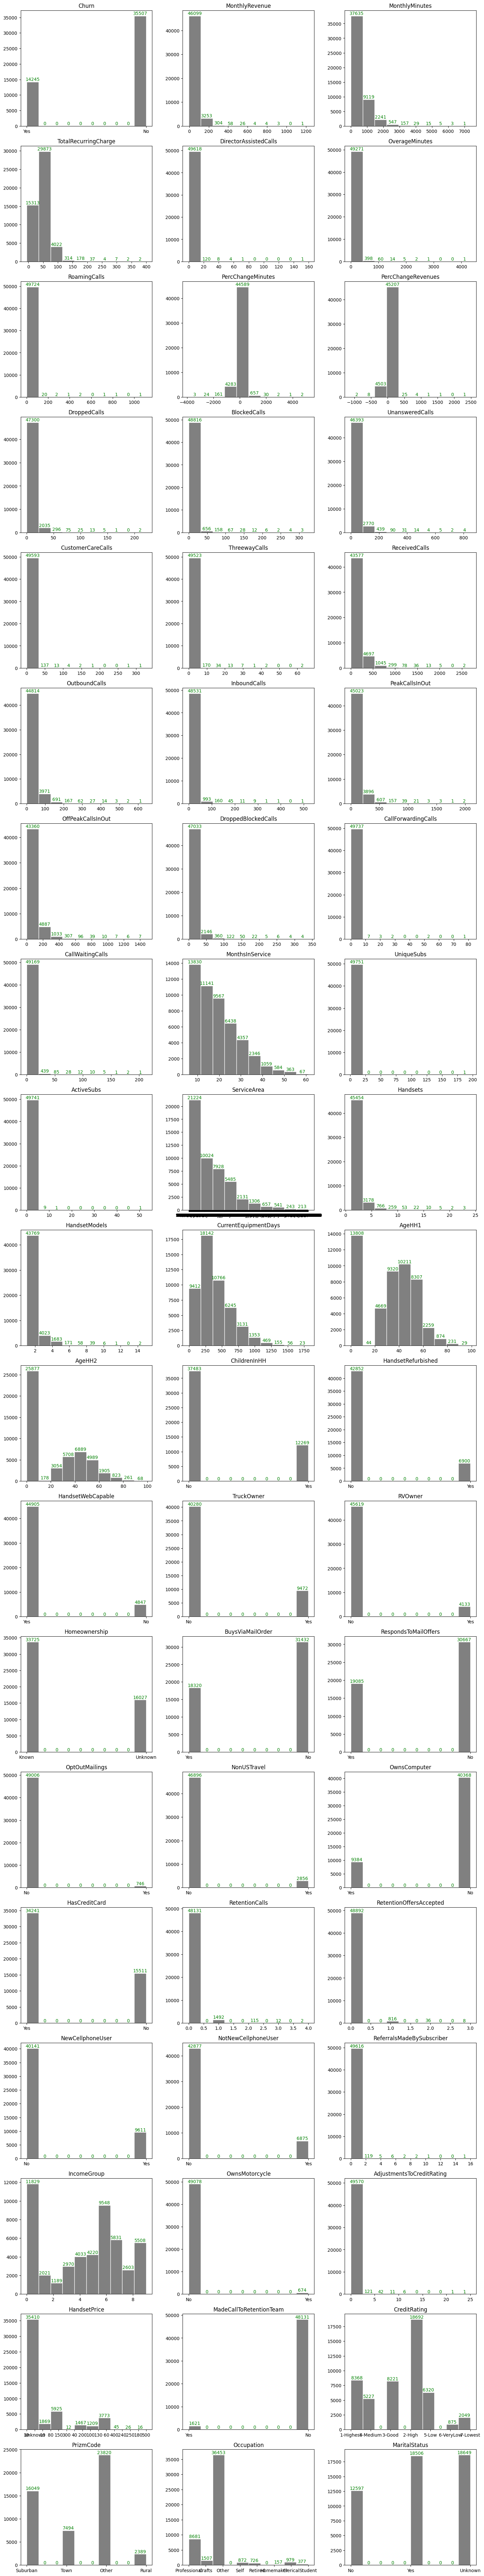

In [12]:
plt.figure(figsize=(15,100))
try:
    for i, col in enumerate(c2c.columns[1:70].to_list()):
        plt.subplot(24, 3, i + 1)
        values, bins, bars = plt.hist(c2c[col], label=col,color='gray',  edgecolor='white')
        plt.title(col)
        plt.tight_layout()
        plt.bar_label(bars, fontsize=10, color='green')
except Exception as e:
    print(col,e)

In [13]:
c2c = c2c.drop(columns=['CustomerID', 'ServiceArea', 'Homeownership', 'NotNewCellphoneUser', 'MadeCallToRetentionTeam', 'AdjustmentsToCreditRating'])

In [14]:
c2c = c2c[c2c["HandsetPrice"] != 'Unknown']

In [15]:
c2c = c2c[c2c["MaritalStatus"] != 'Unknown']

In [16]:
len(c2c)

13240

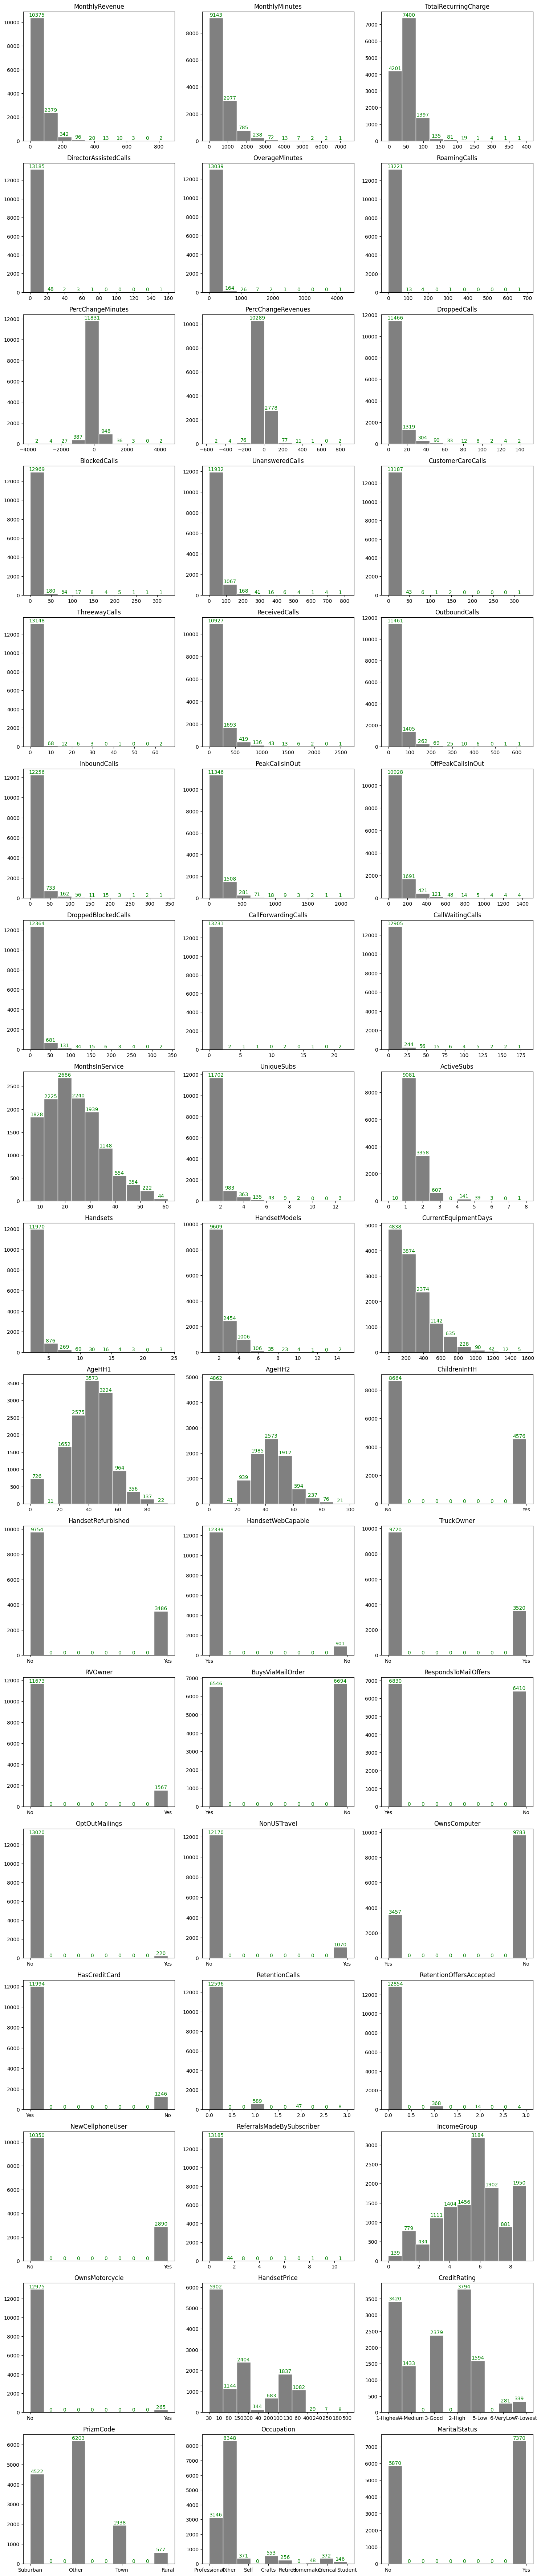

In [17]:
plt.figure(figsize=(15,100))
try:
    for i, col in enumerate(c2c.columns[1:70].to_list()):
        plt.subplot(24, 3, i + 1)
        values, bins, bars = plt.hist(c2c[col], label=col,color='gray',  edgecolor='white')
        plt.title(col)
        plt.tight_layout()
        plt.bar_label(bars, fontsize=10, color='green')
except Exception as e:
    print(col,e)

In [18]:
c2c.info()

<class 'pandas.core.frame.DataFrame'>
Index: 13240 entries, 0 to 51043
Data columns (total 52 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Churn                      13240 non-null  object 
 1   MonthlyRevenue             13240 non-null  float64
 2   MonthlyMinutes             13240 non-null  float64
 3   TotalRecurringCharge       13240 non-null  float64
 4   DirectorAssistedCalls      13240 non-null  float64
 5   OverageMinutes             13240 non-null  float64
 6   RoamingCalls               13240 non-null  float64
 7   PercChangeMinutes          13240 non-null  float64
 8   PercChangeRevenues         13240 non-null  float64
 9   DroppedCalls               13240 non-null  float64
 10  BlockedCalls               13240 non-null  float64
 11  UnansweredCalls            13240 non-null  float64
 12  CustomerCareCalls          13240 non-null  float64
 13  ThreewayCalls              13240 non-null  float64


In [19]:
cat_list = []
for col in c2c.columns:
    if c2c[col].dtype == 'object':
        cat_list.append(col)
cat_list.sort()
cat_list

['BuysViaMailOrder',
 'ChildrenInHH',
 'Churn',
 'CreditRating',
 'HandsetPrice',
 'HandsetRefurbished',
 'HandsetWebCapable',
 'HasCreditCard',
 'MaritalStatus',
 'NewCellphoneUser',
 'NonUSTravel',
 'Occupation',
 'OptOutMailings',
 'OwnsComputer',
 'OwnsMotorcycle',
 'PrizmCode',
 'RVOwner',
 'RespondsToMailOffers',
 'TruckOwner']

In [20]:
len(cat_list)

19

In [21]:
binary_list = ['Churn',
 'ChildrenInHH',
 'HandsetRefurbished',
 'HandsetWebCapable',
 'TruckOwner',
 'RVOwner',
 'BuysViaMailOrder',
 'RespondsToMailOffers',
 'OptOutMailings',
 'NonUSTravel',
 'OwnsComputer',
 'HasCreditCard',
 'NewCellphoneUser',
 'OwnsMotorcycle',
 'MaritalStatus']
len(binary_list)

15

In [22]:
yes_no_mapping = {'Yes': 1, 'No': 0}
for col in c2c.columns:
    if col in binary_list:
         c2c[col] = c2c[col].map(yes_no_mapping)
c2c.info()

<class 'pandas.core.frame.DataFrame'>
Index: 13240 entries, 0 to 51043
Data columns (total 52 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Churn                      13240 non-null  int64  
 1   MonthlyRevenue             13240 non-null  float64
 2   MonthlyMinutes             13240 non-null  float64
 3   TotalRecurringCharge       13240 non-null  float64
 4   DirectorAssistedCalls      13240 non-null  float64
 5   OverageMinutes             13240 non-null  float64
 6   RoamingCalls               13240 non-null  float64
 7   PercChangeMinutes          13240 non-null  float64
 8   PercChangeRevenues         13240 non-null  float64
 9   DroppedCalls               13240 non-null  float64
 10  BlockedCalls               13240 non-null  float64
 11  UnansweredCalls            13240 non-null  float64
 12  CustomerCareCalls          13240 non-null  float64
 13  ThreewayCalls              13240 non-null  float64


In [23]:
CreditRating_mapping = {'1-Highest':7, '2-High':6, '3-Good':5, '4-Medium':4, '5-Low':3, '6-VeryLow':2, '7-Lowest':1}
c2c["CreditRating"] = c2c["CreditRating"].map(lambda x: CreditRating_mapping[x])
c2c.info()

<class 'pandas.core.frame.DataFrame'>
Index: 13240 entries, 0 to 51043
Data columns (total 52 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Churn                      13240 non-null  int64  
 1   MonthlyRevenue             13240 non-null  float64
 2   MonthlyMinutes             13240 non-null  float64
 3   TotalRecurringCharge       13240 non-null  float64
 4   DirectorAssistedCalls      13240 non-null  float64
 5   OverageMinutes             13240 non-null  float64
 6   RoamingCalls               13240 non-null  float64
 7   PercChangeMinutes          13240 non-null  float64
 8   PercChangeRevenues         13240 non-null  float64
 9   DroppedCalls               13240 non-null  float64
 10  BlockedCalls               13240 non-null  float64
 11  UnansweredCalls            13240 non-null  float64
 12  CustomerCareCalls          13240 non-null  float64
 13  ThreewayCalls              13240 non-null  float64


In [24]:
c2c['HandsetPrice'] = c2c['HandsetPrice'].astype(int)

In [25]:
c2c.info()

<class 'pandas.core.frame.DataFrame'>
Index: 13240 entries, 0 to 51043
Data columns (total 52 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Churn                      13240 non-null  int64  
 1   MonthlyRevenue             13240 non-null  float64
 2   MonthlyMinutes             13240 non-null  float64
 3   TotalRecurringCharge       13240 non-null  float64
 4   DirectorAssistedCalls      13240 non-null  float64
 5   OverageMinutes             13240 non-null  float64
 6   RoamingCalls               13240 non-null  float64
 7   PercChangeMinutes          13240 non-null  float64
 8   PercChangeRevenues         13240 non-null  float64
 9   DroppedCalls               13240 non-null  float64
 10  BlockedCalls               13240 non-null  float64
 11  UnansweredCalls            13240 non-null  float64
 12  CustomerCareCalls          13240 non-null  float64
 13  ThreewayCalls              13240 non-null  float64


In [26]:
cols_to_encode = ['PrizmCode', 'Occupation']   
c2c = pd.get_dummies(c2c, columns=cols_to_encode, drop_first=False)
c2c.info()

<class 'pandas.core.frame.DataFrame'>
Index: 13240 entries, 0 to 51043
Data columns (total 62 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Churn                      13240 non-null  int64  
 1   MonthlyRevenue             13240 non-null  float64
 2   MonthlyMinutes             13240 non-null  float64
 3   TotalRecurringCharge       13240 non-null  float64
 4   DirectorAssistedCalls      13240 non-null  float64
 5   OverageMinutes             13240 non-null  float64
 6   RoamingCalls               13240 non-null  float64
 7   PercChangeMinutes          13240 non-null  float64
 8   PercChangeRevenues         13240 non-null  float64
 9   DroppedCalls               13240 non-null  float64
 10  BlockedCalls               13240 non-null  float64
 11  UnansweredCalls            13240 non-null  float64
 12  CustomerCareCalls          13240 non-null  float64
 13  ThreewayCalls              13240 non-null  float64


In [27]:
bool_cols = c2c.select_dtypes(include='bool').columns
c2c[bool_cols] = c2c[bool_cols].astype(int)
c2c.info()

<class 'pandas.core.frame.DataFrame'>
Index: 13240 entries, 0 to 51043
Data columns (total 62 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Churn                      13240 non-null  int64  
 1   MonthlyRevenue             13240 non-null  float64
 2   MonthlyMinutes             13240 non-null  float64
 3   TotalRecurringCharge       13240 non-null  float64
 4   DirectorAssistedCalls      13240 non-null  float64
 5   OverageMinutes             13240 non-null  float64
 6   RoamingCalls               13240 non-null  float64
 7   PercChangeMinutes          13240 non-null  float64
 8   PercChangeRevenues         13240 non-null  float64
 9   DroppedCalls               13240 non-null  float64
 10  BlockedCalls               13240 non-null  float64
 11  UnansweredCalls            13240 non-null  float64
 12  CustomerCareCalls          13240 non-null  float64
 13  ThreewayCalls              13240 non-null  float64


In [28]:
features = c2c.columns
unique_values = []
for i in features:
    unique_values.append((i,c2c[i].unique()))
unique_values.sort()
unique_values

[('ActiveSubs', array([1, 2, 3, 4, 5, 0, 8, 6])),
 ('AgeHH1',
  array([62., 40., 30., 46., 28., 52., 36., 74., 48., 50., 72., 64., 44.,
         54., 42., 56.,  0., 38., 58., 32., 60., 68., 34., 88., 70., 80.,
         76., 26., 66., 22., 24., 78., 20., 82., 86., 94., 84., 90., 18.,
         92.])),
 ('AgeHH2',
  array([ 0., 42., 54., 58., 46., 34., 68., 22., 30., 74., 38., 48., 50.,
         60., 40., 52., 44., 62., 36., 28., 26., 64., 24., 90., 56., 32.,
         76., 82., 92., 20., 18., 70., 66., 78., 86., 96., 72., 80., 88.,
         84., 98., 94.])),
 ('BlockedCalls',
  array([7.000e-01, 0.000e+00, 7.700e+00, 1.700e+00, 1.000e+00, 3.000e-01,
         3.000e+00, 2.000e+00, 1.300e+00, 6.300e+00, 1.930e+01, 2.300e+00,
         5.000e+00, 2.200e+01, 1.230e+01, 8.700e+00, 4.000e+00, 1.100e+01,
         7.300e+00, 3.300e+00, 5.300e+00, 4.300e+00, 1.900e+01, 1.030e+01,
         1.830e+01, 3.700e+00, 1.130e+01, 2.170e+01, 1.800e+01, 1.970e+01,
         2.530e+01, 2.700e+00, 1.300e+01, 6.0